#Preprocessing data

1. First we aggregate the stations in each region
2. 

In [10]:
import pandas as pd

def csv_to_dataframe(file_path):
    df = pd.read_csv(file_path)
    
    df.replace('-', pd.NA, inplace=True)
    df.dropna(inplace=True)

    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Year'] = df['Date'].dt.year

    df = df.drop(columns='Station')

    df['Total Rainfall Mm'] = pd.to_numeric(df['Total Rainfall Mm'], errors='coerce')
    df['Mean Air Temperature in Celsius'] = pd.to_numeric(df['Mean Air Temperature in Celsius'], errors='coerce')
    df['Mean Vapour Pressure Hpa'] = pd.to_numeric(df['Mean Vapour Pressure Hpa'], errors='coerce')
    df['Mean Wind Speed M/Sec'] = pd.to_numeric(df['Mean Wind Speed M/Sec'], errors='coerce')
    df['Days Of Wind Gust >= 24 Knots in Day'] = pd.to_numeric(df['Days Of Wind Gust >= 24 Knots in Day'], errors='coerce')
    df['Standard Deviation Of Daily Mean Temperature in Celsius'] = pd.to_numeric(df['Standard Deviation Of Daily Mean Temperature in Celsius'], errors='coerce')

    df_grouped = df.groupby('Date').mean().reset_index()

    return df_grouped

In [11]:
file = '../ClimateDataProcessing/NewCentralNorthRegions.csv'
climateData = csv_to_dataframe(file)

ElectricityDataBusiness = pd.read_csv('../ElectricityData/Business_demand_trends_20240901140306.csv')
ElectricityDataResidential = pd.read_csv('../ElectricityData/Residential_consumption_trends_20240901141207.csv')



ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 2


In [3]:
test


,Date,Total Rainfall Mm,Mean Air Temperature in Celsius,Mean Vapour Pressure Hpa,Mean Wind Speed M/Sec,Days Of Wind Gust >= 24 Knots in Day,Standard Deviation Of Daily Mean Temperature in Celsius,Year
0,2010-01-01,172.500000,18.600000,16.500,3.500000,9.250000,2.475000,2010.0
1,2010-02-01,27.150000,19.900000,18.875,2.700000,2.500000,1.750000,2010.0
2,2010-03-01,23.566667,17.600000,14.800,3.066667,6.666667,2.066667,2010.0
3,2010-04-01,58.150000,15.075000,13.800,2.775000,5.500000,2.200000,2010.0
4,2010-05-01,198.266667,12.533333,12.600,2.566667,7.333333,2.333333,2010.0
...,...,...,...,...,...,...,...,...
170,2024-03-01,63.200000,16.225000,13.725,3.800000,13.000000,2.625000,2024.0
171,2024-04-01,52.350000,14.800000,13.700,3.175000,7.500000,2.725000,2024.0
172,2024-05-01,100.400000,10.950000,10.750,3.150000,8.000000,1.650000,2024.0
173,2024-06-01,119.000000,10.700000,11.400,3.050000,7.500000,2.150000,2024.0


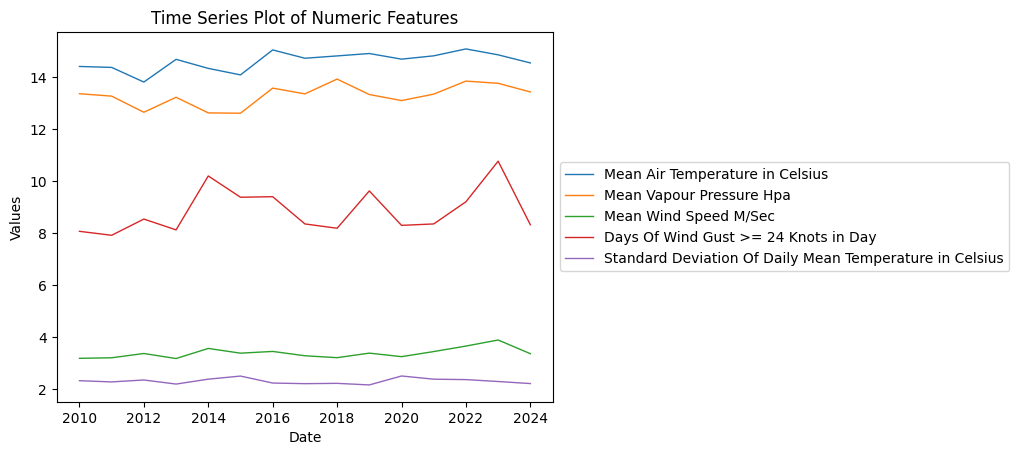

In [4]:
import matplotlib.pyplot as plt

byyear = test.groupby('Year').mean().reset_index()

numeric_columns = [ 'Mean Air Temperature in Celsius', 
                   'Mean Vapour Pressure Hpa', 
                   'Mean Wind Speed M/Sec', 
                   'Days Of Wind Gust >= 24 Knots in Day', 
                   'Standard Deviation Of Daily Mean Temperature in Celsius']

byyear.plot(x='Year', y=numeric_columns, kind='line', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot of Numeric Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

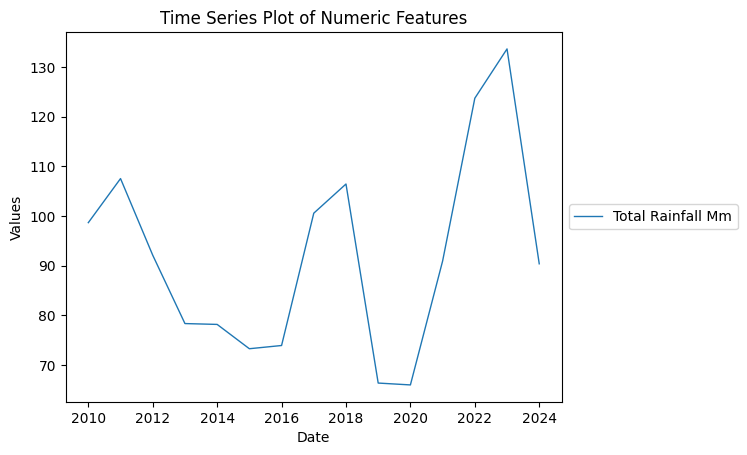

In [5]:
byyear.plot(x='Year', y='Total Rainfall Mm', kind='line', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot of Numeric Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

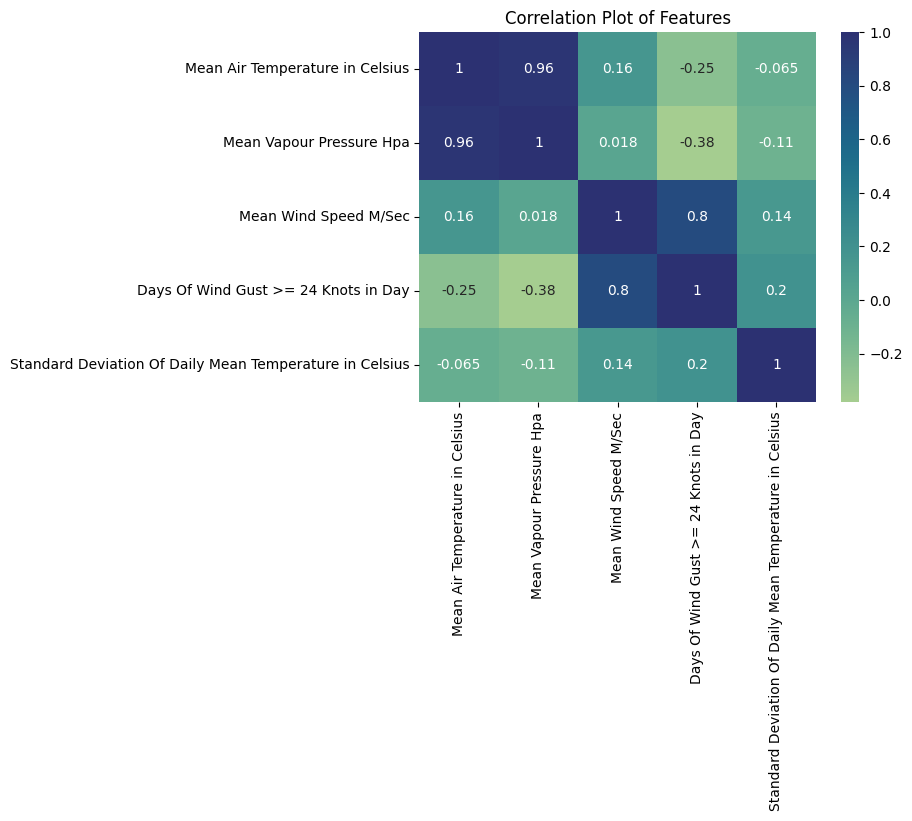

In [9]:
import seaborn as sns

correlation_matrix = test[[ 'Mean Air Temperature in Celsius', 
                   'Mean Vapour Pressure Hpa', 
                   'Mean Wind Speed M/Sec', 
                   'Days Of Wind Gust >= 24 Knots in Day', 
                   'Standard Deviation Of Daily Mean Temperature in Celsius']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Plot of Features')
plt.show()